In [ ]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import BatchNormalization
import cv2
from skimage.transform import resize

In [ ]:
def block(x,filters,kernel_size,activation,pool_size,strides):
    for i in range(0,3):
        x=tf.keras.layers.Conv2D(filters=filters,kernel_size=kernel_size,activation=activation,padding='same')(x)
    x=tf.keras.layers.MaxPooling2D(pool_size=pool_size,strides=strides)(x)
    x=tf.keras.layers.Dropout(0.2)(x)
    return x

In [ ]:
def encoder(inputs):
    x=block(inputs,filters=64,kernel_size=(2,2),activation='relu',pool_size=(2,2),strides=(2,2))
    p1=x
    x=block(inputs,filters=128,kernel_size=(2,2),activation='relu',pool_size=(2,2),strides=(2,2))
    p2=x
    x=block(x,filters=256,kernel_size=(2,2),activation='relu',pool_size=(2,2),strides=(2,2))
    p3=x
    x=block(x,filters=512,kernel_size=(2,2),activation='relu',pool_size=(2,2),strides=(2,2))
    p4=x
    x=block(x,filters=512,kernel_size=(2,2),activation='relu',pool_size=(2,2),strides=(2,2))
    p5=x
    return (p3,p4,p5)

In [ ]:
def decoder(convs):
    f3,f4,f5=convs
    o=tf.keras.layers.Conv2DTranspose(512,kernel_size=(2,2),strides=(2,2),padding='same')(f5)
    o=tf.keras.layers.Conv2D(512,(2,2),activation='relu',padding='same')(o)
    o2=f4
    o2=tf.keras.layers.Conv2D(512,(2,2),activation='relu',padding='same')(o2)
    o=tf.keras.layers.Add()([o,o2])
    o=tf.keras.layers.Conv2DTranspose(256,kernel_size=(2,2),strides=(2,2),padding='same')(o)
    o=tf.keras.layers.Conv2D(256,(2,2),activation='relu',padding='same')(o)
    o3=f3
    o3=tf.keras.layers.Conv2D(256,(2,2),activation='relu',padding='same')(o3)
    o=tf.keras.layers.Add()([o,o3])
    o4=tf.keras.layers.Conv2DTranspose(1,kernel_size=(4,4),strides=(4,4))(o)
    o=tf.keras.layers.Activation('relu')(o4)
    return o
    

In [ ]:
def fcn8():
    inputs=tf.keras.layers.Input(shape=(192,192,3,))
    convs=encoder(inputs)
    outputs=decoder(convs)
    model=tf.keras.Model(inputs=inputs,outputs=outputs)
    return model

In [ ]:
def main():
  train_images=np.asarray(pickle.load(open("/content/full_CNN_train.p","rb")),dtype=np.float32)
  labels = np.asarray(pickle.load(open("/content/full_CNN_labels (1).p", "rb" )),dtype=np.float32)
  train_images=train_images/255.0
  train_images, labels = shuffle(train_images, labels)
  X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.3)
  model = fcn8()
  model.compile(optimizer='Adam', loss='mse',metrics=['accuracy'])
  model.fit(X_train,y_train,epochs=10,validation_data=(X_val, y_val))
  model.save('/content/drive/MyDrive/fcn8_model.h5')
  model.summary()

In [ ]:
if __name__ == '__main__':
  main()

Epoch 1/10
280/280 [==============================] - 188s 589ms/step - loss: 5132.8491 - accuracy: 0.5602 - val_loss: 3755.3767 - val_accuracy: 0.6440
Epoch 2/10
280/280 [==============================] - 161s 576ms/step - loss: 2741.5366 - accuracy: 0.6688 - val_loss: 1633.4744 - val_accuracy: 0.7155
Epoch 3/10
280/280 [==============================] - 161s 576ms/step - loss: 1112.5570 - accuracy: 0.7739 - val_loss: 871.4842 - val_accuracy: 0.7941
Epoch 4/10
280/280 [==============================] - 161s 575ms/step - loss: 741.5959 - accuracy: 0.7986 - val_loss: 577.6794 - val_accuracy: 0.8039
Epoch 5/10
280/280 [==============================] - 161s 575ms/step - loss: 542.5301 - accuracy: 0.8070 - val_loss: 745.0823 - val_accuracy: 0.7965
Epoch 6/10
280/280 [==============================] - 161s 575ms/step - loss: 517.1888 - accuracy: 0.8093 - val_loss: 511.0235 - val_accuracy: 0.8140
Epoch 7/10
280/280 [==============================] - 161s 575ms/step - loss: 458.3602 - accura

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80, 160, 3)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 80, 160, 128) 1664        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 80, 160, 128) 65664       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 80, 160, 128) 65664       conv2d_1[0][0]                   
______________________________________________________________________________________________

In [1]:
import cv2
model.save('/content/fcn8_model.h5')
model.summary()
small_img = cv2.resize(image, (160, 80))
small_img = np.array(small_img)
small_img = small_img[None,:,:,:]
prediction = model.predict(small_img)
prediction

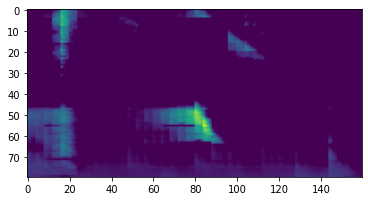

In [ ]:
if(len(prediction.shape)==4):
  plt.imshow(np.squeeze(prediction))
else:
  plt.imshow(prediction)

In [ ]:
if(len(prediction.shape)==4):
  plt.imshow(np.squeeze(prediction))
else:
  plt.imshow(prediction)